## What is a CNN?
- A Convolutional Neural Network is type of neural network that is used mainly in image processing applications. Other applications of CNNs are in sequential data such as audio, time series, and NLP. 
- Convolution is one of the main building blocks of a CNN. 
- The term convolution refers to the mathematical combination of two functions to produce a third function. It merges two sets of information.

## Types of CNN
- 1D convolution — majorly used where the input is sequential such as text or audio.
- 2D convolution — majorly used where the input is an image.
- 3D convolution — majorly used in 3D medical imaging or detecting events in videos. 

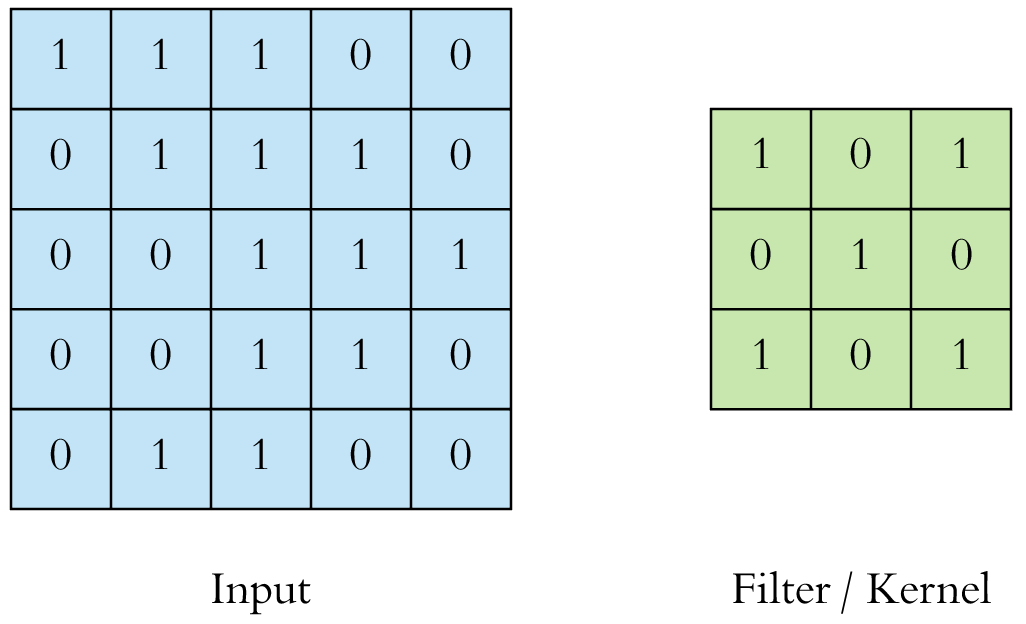

![SegmentLocal](GIFs/cnn.gif "segment")

![SegmentLocal](GIFs/stride.gif "segment")

![SegmentLocal](GIFs/stride2.gif "segment")

![SegmentLocal](GIFs/padding.gif "segment")

### Pooling
Pooling reduces the size of the input and makes the feature dimension smaller.
Because of lower spatial size, the number of parameters in the network are reduced. This helps in combating overfitting.



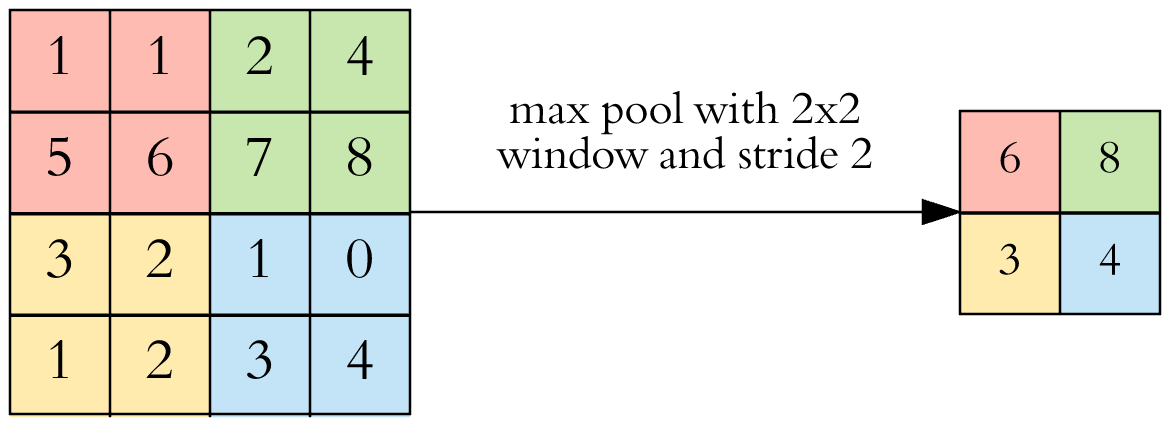

In [ ]:
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import torch
#import torch.utils.DataLoader as dl

In [ ]:
#Loading MNIST dataset
transform = transforms.ToTensor()
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform = transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform = transform)

In [ ]:
len(mnist_trainset)
len(mnist_testset)

In [ ]:
train_loader = torch.utils.data.DataLoader(mnist_trainset,batch_size = 8,  shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_testset,batch_size = 8,  shuffle=True)

In [ ]:
class NeuralNet(nn.Module):
    #Initialising model
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,1)
        self.conv2 = nn.Conv2d(32,64,3,1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)
    # Defining flow of the model
    def forward(self,x):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=F.max_pool2d(x,2)
        #flattening the out put of pooling layer
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
#Training the model
model = NeuralNet()
optimizer = optim.Adam(model.parameters())
for (i,l) in train_loader:
    optimizer.zero_grad()
    output = model(i)
    loss = F.nll_loss(output, l)
    #backprop: computes gradient
    loss.backward()
    #updates the weights
    optimizer.step()

In [ ]:
#Evaluating the model

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += F.nll_loss(output, target, 
                         reduction='sum').item() 
        pred = output.argmax(dim=1, keepdim=True)  
        correct += pred.eq(target.view_as(pred)).sum().item()
test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

## Logistic Regression

In [ ]:
class LogisticRegression(nn.Module): 
    def __init__(self, input_size, num_classes): 
        super(LogisticRegression, self).__init__() 
        self.linear = nn.Linear(input_size, num_classes) 
    def forward(self, x): 
        out = self.linear(x) 
        return out 



In [ ]:
model = LogisticRegression(784, 10) 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
for i, (images, labels) in enumerate(train_loader): 

    outputs = model(images) 
    loss = F.cross_entropy(outputs, labels) 
    loss.backward() 
    optimizer.step() 


In [ ]:
model.eval()
correct = 0 
total = 0 
for images, labels in test_loader: 

outputs = model(images) 
_, predicted = torch.max(outputs.data, 1) total += labels.size(0) 
correct += (predicted == labels).sum() 
print('Accuracy of the model on test images: % d %%' % ( 100 * correct / total)) 


## Difference between Perceptron, MLP and ANN

- Perceptron: the perceptron is an algorithm for supervised learning of binary classifiers. (linear)

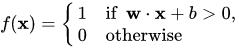

- MLP: A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). 

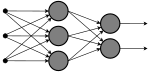

- ANN: can have loops

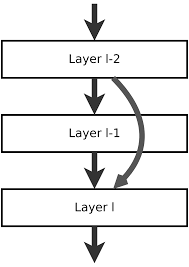

## Optimization Algorithms

Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses.

### 1. Gradient Descent

θ=θ−α⋅∇J(θ)

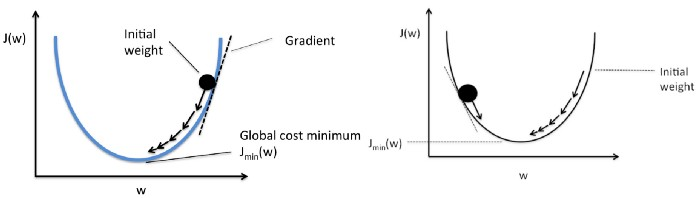

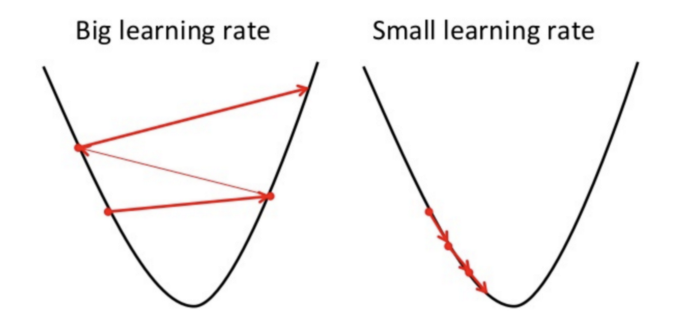

### 2. Stochastic Gradient Descent

It tries to update the model’s parameters more frequently. In this, the model parameters are altered after computation of loss on each training example. So, if the dataset contains 1000 rows SGD will update the model parameters 1000 times in one cycle of dataset instead of one time as in Gradient Descent.

θ=θ−α⋅∇J(θ;x(i);y(i)) , where {x(i) ,y(i)} are the training examples.